<a href="https://colab.research.google.com/github/PedroLopesMaia/diabetes-diagnosis/blob/main/diabetes_diagnostic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Meu trabalho será criar um classificador capaz de identificar pessoas diabéticas. Este documento contém o código usado para explorar os dados e para treinar os algoritmos de machine learning, além de textos elucidativos. O dataset utilizado é proveniente do hospital de frankfurt, Alemanha.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


A insulina é um hormônio produzido pelo pâncrias, necessário para reduzir a quantidade de glicose no sangue. Minha primeira ideia foi observar a relação entre os níveis de glicose e insulina nos pacientes

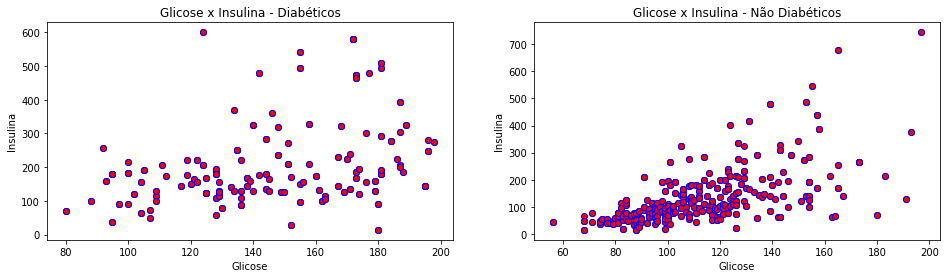

In [ ]:
labels = ['Glucose', 'Insulin', 'Outcome']
insulin_glucose = df.copy()[labels]
insulin_glucose.sort_values(by=['Glucose'], inplace=True)
insulin_glucose.drop(insulin_glucose[(insulin_glucose['Insulin'] == 0) | (insulin_glucose['Glucose'] == 0)].index, inplace=True)
outcome1 = insulin_glucose[insulin_glucose['Outcome'] == 1]
outcome0 = insulin_glucose[insulin_glucose['Outcome'] == 0]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
ax1.scatter(x=outcome1['Glucose'], y=outcome1['Insulin'], marker='o', c='r', edgecolor='b')
ax2.scatter(x=outcome0['Glucose'], y=outcome0['Insulin'], marker='o', c='r', edgecolor='b')

ax1.set_title('Glicose x Insulina - Diabéticos')
ax1.set_xlabel('Glicose')
ax1.set_ylabel('Insulina')
ax2.set_title('Glicose x Insulina - Não Diabéticos')
ax2.set_xlabel('Glicose')
ax2.set_ylabel('Insulina')

plt.show()

A maior parte dos não diabéticos se concentram próximos ao canto inferior esquerdo do segundo gráfico, o que era esperado de pessoas dessa categoria já que a diabetes ocorre devido ao acumulo de glicose no sangue e quanto menos glicose há no corpo do paciente, menos insulina é produzida por ele. Os diabéticos aparecem de forma mais bem distribuída ao longo do gráfico, havendo uma quantidade maior de pacientes com níveis de glicose superior a 160.

Os próximos gráficos foram gerados para investigar a relação entre o número de gestações e a ocorrência de diabetes. Cada fatia representa o número de gestações.

In [ ]:
df['Pregnancies'].unique()

array([ 2,  0,  1,  4,  8,  3,  6,  5,  7, 10, 12,  9, 11, 13, 15, 17, 14])

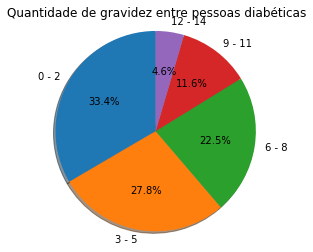

In [ ]:
labels = ['Pregnancies', 'Outcome']
diabetes_pregnancies_df = df.copy()[labels]
dpregnancies1 = len(diabetes_pregnancies_df[(diabetes_pregnancies_df['Pregnancies'] <= 2) & (diabetes_pregnancies_df['Outcome'] == 1)].index)
dpregnancies2 = len(diabetes_pregnancies_df[(diabetes_pregnancies_df['Pregnancies'] > 2) & (diabetes_pregnancies_df['Pregnancies'] <= 5) & (diabetes_pregnancies_df['Outcome'] == 1)].index)
dpregnancies3 = len(diabetes_pregnancies_df[(diabetes_pregnancies_df['Pregnancies'] > 5) & (diabetes_pregnancies_df['Pregnancies'] <= 8) & (diabetes_pregnancies_df['Outcome'] == 1)].index)
dpregnancies4 = len(diabetes_pregnancies_df[(diabetes_pregnancies_df['Pregnancies'] > 8) & (diabetes_pregnancies_df['Pregnancies'] <= 11) & (diabetes_pregnancies_df['Outcome'] == 1)].index)
dpregnancies5 = len(diabetes_pregnancies_df[(diabetes_pregnancies_df['Pregnancies'] > 11) & (diabetes_pregnancies_df['Pregnancies'] <= 14) & (diabetes_pregnancies_df['Outcome'] == 1)].index)

pregnancies_df = df.copy()[labels]
pregnancies1 = len(pregnancies_df[(pregnancies_df['Pregnancies'] <= 2) & (pregnancies_df['Outcome'] == 0)].index)
pregnancies2 = len(pregnancies_df[(pregnancies_df['Pregnancies'] > 2) & (pregnancies_df['Pregnancies'] <= 5) & (pregnancies_df['Outcome'] == 0)].index)
pregnancies3 = len(pregnancies_df[(pregnancies_df['Pregnancies'] > 5) & (pregnancies_df['Pregnancies'] <= 8) & (pregnancies_df['Outcome'] == 0)].index)
pregnancies4 = len(pregnancies_df[(pregnancies_df['Pregnancies'] > 8) & (pregnancies_df['Pregnancies'] <= 11) & (pregnancies_df['Outcome'] == 0)].index)
pregnancies5 = len(pregnancies_df[(pregnancies_df['Pregnancies'] > 11) & (pregnancies_df['Pregnancies'] <= 14) & (pregnancies_df['Outcome'] == 0)].index)

sizes_d = [dpregnancies1, dpregnancies2, dpregnancies3, dpregnancies4, dpregnancies5]
sizes = [pregnancies1, pregnancies2, pregnancies3, pregnancies4, pregnancies5]

fig1, ax1 = plt.subplots(figsize=(4,4))
ax1.set_title('Quantidade de gravidez entre pessoas diabéticas')
ax1.pie(sizes_d, labels=['0 - 2', '3 - 5', '6 - 8', '9 - 11', '12 - 14'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

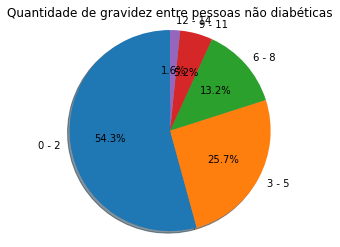

In [ ]:
fig1, ax1 = plt.subplots(figsize=(4,4))
ax1.set_title('Quantidade de gravidez entre pessoas não diabéticas')
ax1.pie(sizes, labels=['0 - 2', '3 - 5', '6 - 8', '9 - 11', '12 - 14'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Mais da metade dos não diabéticos tiveram menos de três filhos enquanto que entre os diabéticos essa categoria representa aproximadamente um terço dos pacientes. O número de pacientes que tiveram entre seis e onze filhos também é maior entre diabéticos, o que me leva a crer que o número de gestações tem grande influência na condição do paciente quanto a diabetes.

O gráfico abaixo foi gerado para comparar a relação entre os índices de massa corparal e idades dos pacientes diabéticos com os não diabéticos.

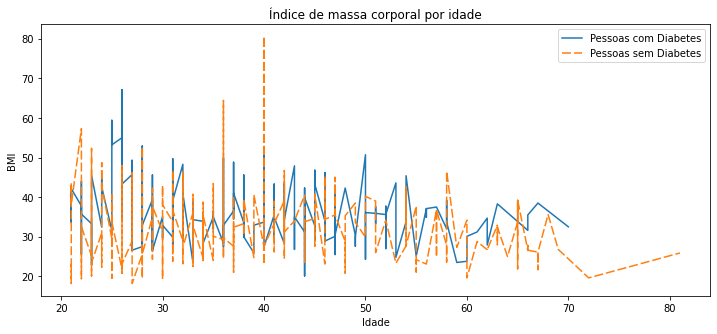

In [ ]:
labels = ['Age', 'BMI', 'Outcome']
age_bmi = df.copy()[labels]
age_bmi.drop(age_bmi[age_bmi['BMI'] == 0].index, inplace=True)
age_bmi.sort_values(by=['Age'], inplace=True)

x1 = age_bmi[age_bmi['Outcome'] == 1]['Age']
y1 = age_bmi[age_bmi['Outcome'] == 1]['BMI']
x2 = age_bmi[age_bmi['Outcome'] == 0]['Age']
y2 = age_bmi[age_bmi['Outcome'] == 0]['BMI']

fig, ax = plt.subplots(figsize=(12,5))
ax.set_title('Índice de massa corporal por idade')
ax.set_ylabel('BMI')
ax.set_xlabel('Idade')

line1, = ax.plot(x1, y1, label='Pessoas com Diabetes')
line2, = ax.plot(x2, y2, dashes=[6, 2], label='Pessoas sem Diabetes')

ax.legend()
plt.show()

A curva azul permanece acima da curva laranja durante grande parte do gráfico, principalmente entre pacientes de 20 a 40 anos e entre pacientes a partir de 60 anos. Isso indica que pessoas com maior massa corporal tendem a desenvolver diabetes com mais frequência.

A "diabetes pedigree function" é uma função que calcula a probabilidade de um paciente desenvolver diabetes a partir de seu histórico familiar. O próximo gráfico exibe a frequência de pacientes por valores dessa função.

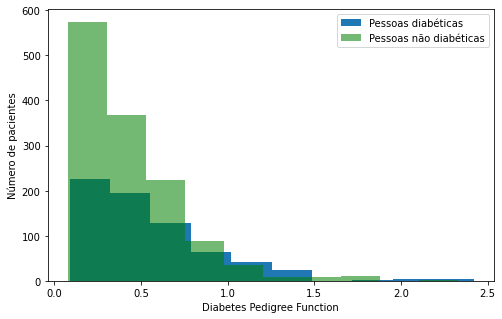

In [ ]:
labels = ['DiabetesPedigreeFunction', 'Outcome']
dpf_outcome = df.copy()[labels]

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.hist(dpf_outcome[dpf_outcome['Outcome'] == 1]['DiabetesPedigreeFunction'], label='Pessoas diabéticas')
ax1.hist(dpf_outcome[dpf_outcome['Outcome'] == 0]['DiabetesPedigreeFunction'], alpha=0.55, color='green', label='Pessoas não diabéticas')
ax1.set_ylabel('Número de pacientes')
ax1.set_xlabel('Diabetes Pedigree Function')
ax1.legend()
plt.show()

Como pacientes não diabéticos aparecem menos na região mais à esquerda do gráfico e pacientes diabéticos aparecem de forma mais destacada à direita, apesar de em pouca quantidade, fica evidente que os valores dessa função possuem influência na condição do indivíduo.

# Modelos.

## Random Forest

Nesta seção fiz o treinamento de uma random forest seguindo a orientação desse tutorial: https://towardsdatascience.com/machine-learning-step-by-step-6fbde95c455a. Meu código difere do código de exemplo apenas por causa dos hyperparâmetros encontrados na minha análise dos gráficos gerados.

Foram treinados três versões da RF: o modelo simples, o modelo treinado com dados processados com PCA e o modelo treinado com dados processados com PCA e com hyperparâmetros obtidos em uma busca exaustiva.

In [ ]:
from sklearn.model_selection import train_test_split

df_copy = df.copy()
X = df_copy.drop('Outcome', axis=1)
y = df_copy['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.30, random_state=2021, stratify=y)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

1.0

Usei esse primeiro modelo para encontrar os atributos mais importantes para o diagnóstico, assim respondendo uma das perguntas escritas no artigo.

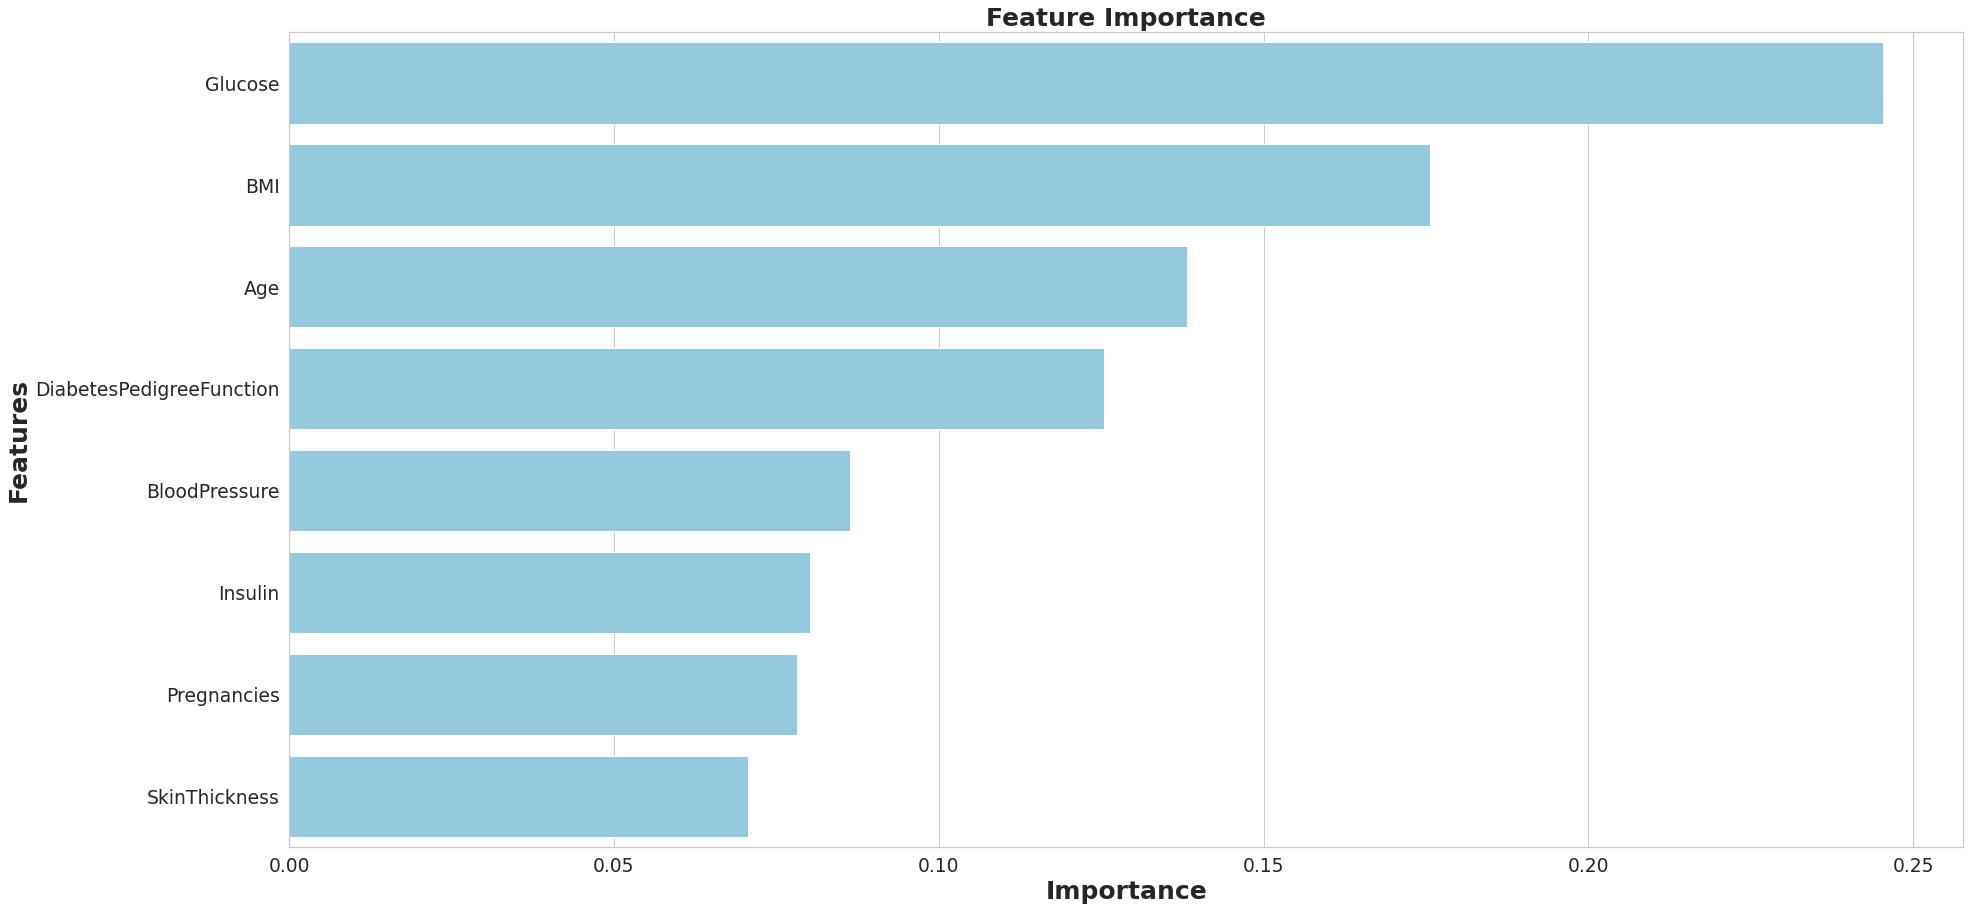

None

,Features,Gini-Importance
0,Glucose,0.245441
1,BMI,0.175598
2,Age,0.138267
3,DiabetesPedigreeFunction,0.125432
4,BloodPressure,0.086310
5,Insulin,0.080152
6,Pregnancies,0.078228
7,SkinThickness,0.070572


In [ ]:
import seaborn as sns

feats = {}
for feature, importance in zip(df_copy.columns, rfc.feature_importances_):
  feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

Gini-Importance é uma pontuação que indica o nível de redução de impureza que determinado atributo proporciona à arvore de decisão. Um atributo é dito ser puro quando ele consegue separar todas as instâncias de uma mesma classe. Glucose é o principal atributo no dataset por conta de seu gini-importance seu o mais alto.

Para o próximo modelo eu criei um bloco apenas para descobrir um bom número de componentes para a RF com PCA. O gráfico e o dataframe mostram que a melhor opção é seis componentes porque esse número apresenta o melhor CVR.

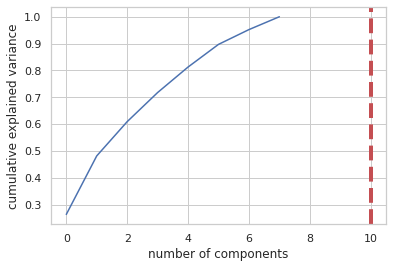

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.263402,0.263402
1,0.481423,0.218021
2,0.609007,0.127584
3,0.717485,0.108477
4,0.812520,0.095035
5,0.896972,0.084452
6,0.952060,0.055088
7,1.000000,0.047940


In [ ]:
from sklearn.decomposition import PCA

pca_test = PCA(n_components=8)
pca_test.fit(X_train_scaled)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [ ]:
pca = PCA(n_components=6)
pca.fit(X_train_scaled)

X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [ ]:
columns = X_train.columns
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=columns,
                           index=pca_dims)
pca_test_df.head(10).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7
Pregnancies,0.052894,0.600970,0.020415,0.125141,0.492755,0.079304,-0.577501,0.193276
Glucose,0.375333,0.211270,0.469222,-0.500235,-0.357137,0.107308,0.023761,0.452171
BloodPressure,0.322172,0.260218,-0.508274,0.104798,-0.470333,-0.556980,-0.164815,0.023731
SkinThickness,0.476673,-0.239297,-0.258841,0.129135,0.478848,-0.071113,0.380523,0.502688
Insulin,0.474988,-0.206615,0.287481,-0.272664,0.318405,-0.373374,-0.183415,-0.547974
BMI,0.461622,-0.035167,-0.364931,-0.027831,-0.141971,0.725253,-0.133874,-0.296056
DiabetesPedigreeFunction,0.278552,-0.099363,0.481059,0.789917,-0.224438,0.035979,-0.073614,0.007953
Age,0.094949,0.644534,0.082672,0.085774,0.085008,0.014777,0.661048,-0.341964


O dataframe acima serve para visualizar os pesos dos atributos em cada componente.

Antes de usar o gridsearch, usei a função RandomizedSearchCV para reduzir o espaço de busca dos meus hyperparâmetros. Os gráficos que foram criados serviram para determinar quais foram os hyperparâmetros utilizados para encontrar a combinação necessária entre eles para obter o melhor modelo.

In [ ]:
rfc_1 = RandomForestClassifier()
rfc_1.fit(X_train_scaled_pca, y_train)
display(rfc_1.score(X_train_scaled_pca, y_train))

1.0

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc_1, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train_scaled_pca, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.9min finished


{'bootstrap': False,
 'max_depth': 13,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 12,
 'n_estimators': 700}

In [ ]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,700,12,2,sqrt,13,False,0.899993,1
1,700,2,2,log2,11,True,0.898552,2
2,400,23,2,sqrt,14,False,0.886421,3
3,600,23,2,sqrt,15,False,0.882134,4
4,700,23,7,log2,15,False,0.867127,5
5,700,18,7,sqrt,7,False,0.852846,6
6,1000,12,7,sqrt,10,True,0.847132,7
7,500,18,7,log2,7,True,0.840709,8
8,300,28,7,log2,13,True,0.834991,9
9,600,50,2,sqrt,7,False,0.830708,10


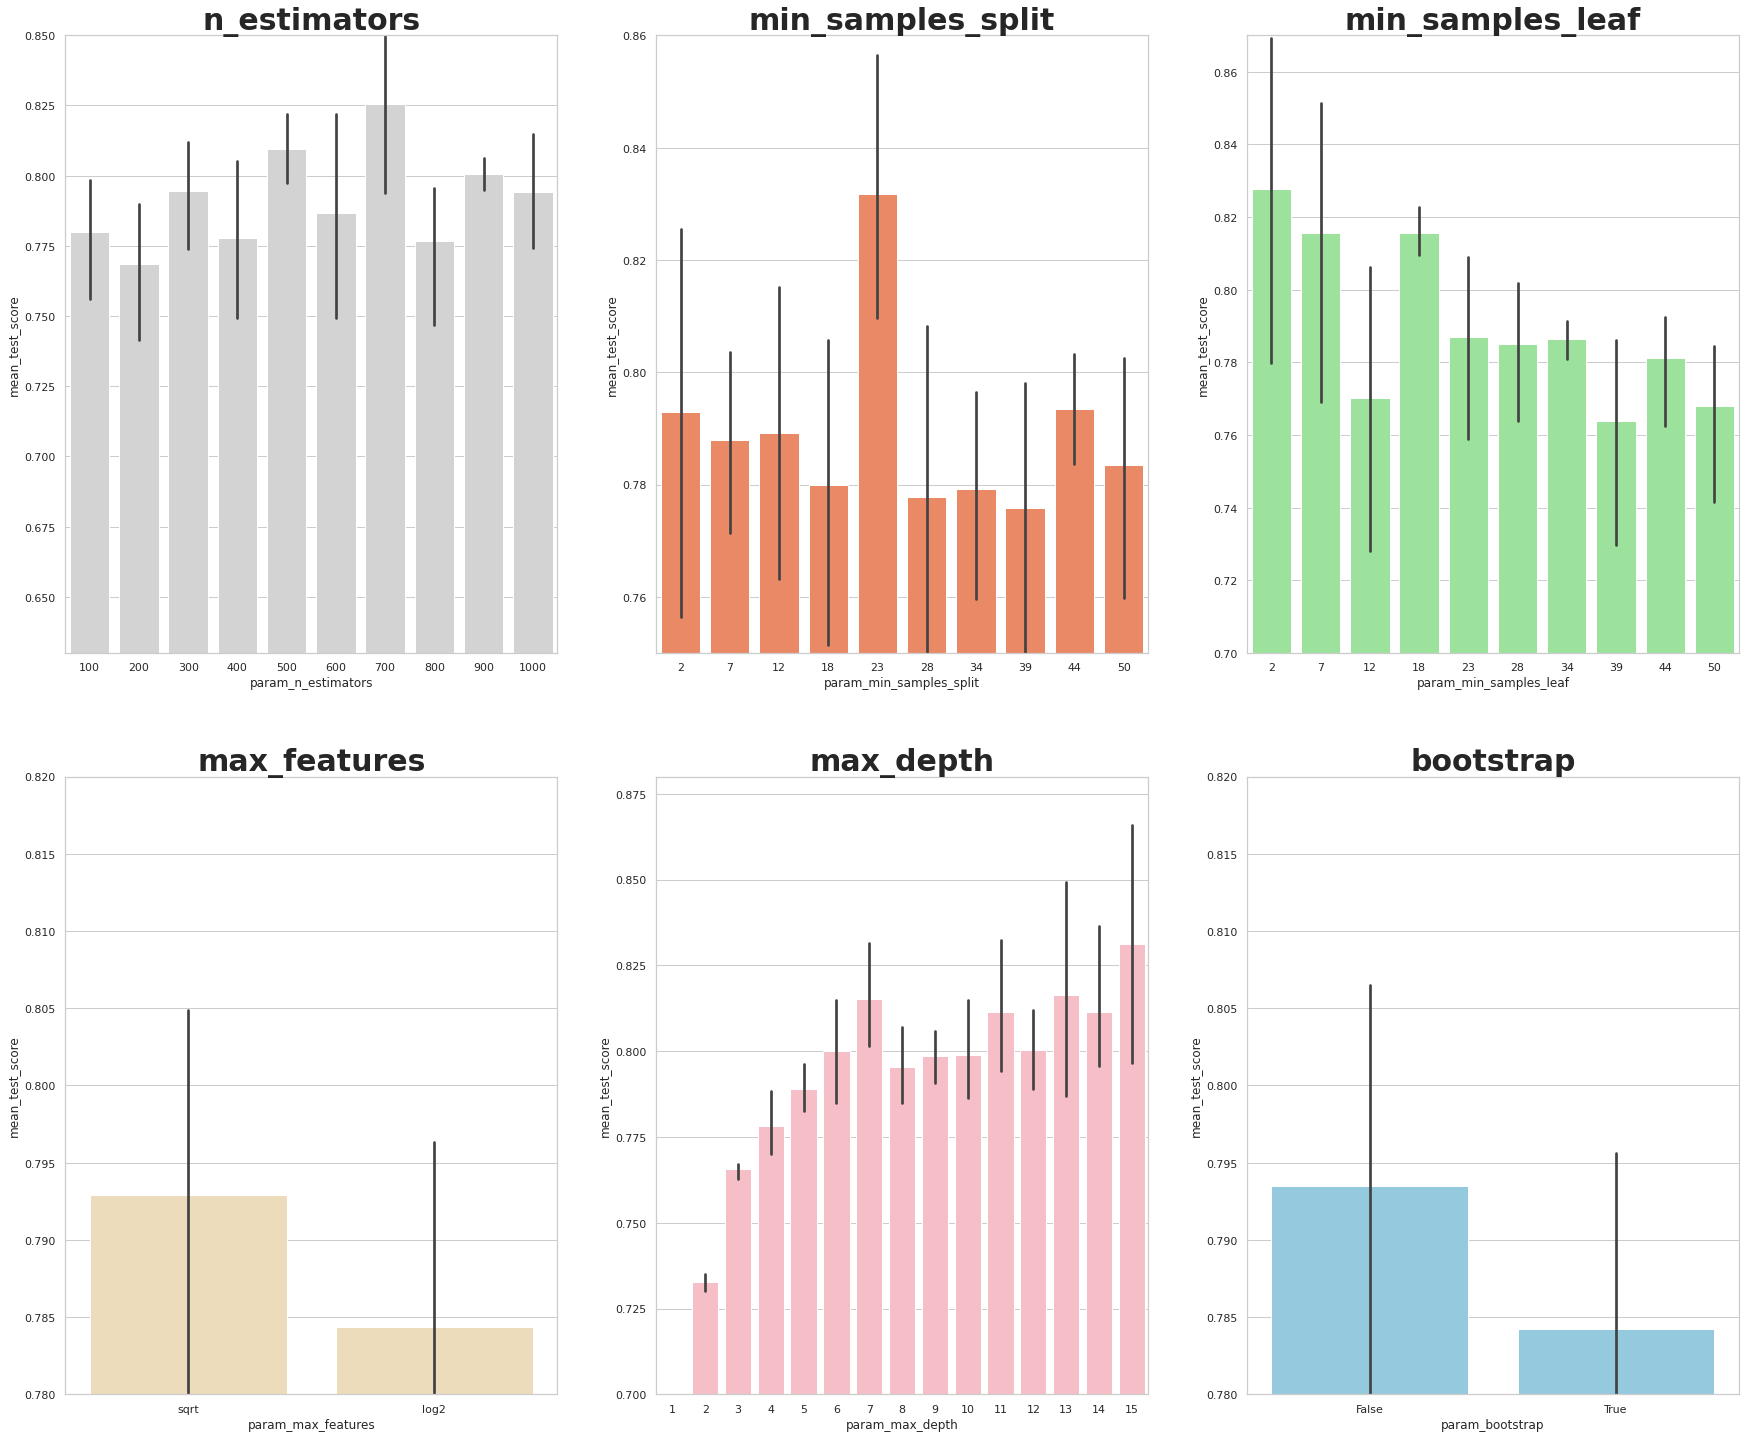

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.63,.85])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')

sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.75,.86])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')

sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.70,.87])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')

sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.78,.82])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')

sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.70,.88])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')

sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.78,.82])

axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [500,700,900]
max_features = ['sqrt']
max_depth = [6,7,11,13,14,15]
min_samples_split = [20,21,22,23,24,25]
min_samples_leaf = [2,3,4,18,19,20]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rfc_1, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train_scaled_pca, y_train)
rfc_2 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed: 40.7min finished


{'bootstrap': False,
 'max_depth': 14,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 20,
 'n_estimators': 700}

Após concluir o treino do terceiro modelo comparei o desempenho dos modelos e os exibi atravez de três confusion matrix.

In [ ]:
y_pred = rfc.predict(X_test_scaled)
y_pred_pca = rfc_1.predict(X_test_scaled_pca)
y_pred_gs = rfc_2.predict(X_test_scaled_pca)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
conf_matrix_baseline_pca = pd.DataFrame(confusion_matrix(y_test, y_pred_pca), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
conf_matrix_tuned_pca = pd.DataFrame(confusion_matrix(y_test, y_pred_gs), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)
display('Baseline Random Forest recall score', recall_score(y_test, y_pred))
display(conf_matrix_baseline_pca)
display('Baseline Random Forest With PCA recall score', recall_score(y_test, y_pred_pca))
display(conf_matrix_tuned_pca)
display('Hyperparameter Tuned Random Forest With PCA Reduced Dimensionality recall score', recall_score(y_test, y_pred_gs))

,predicted 0,predicted 1
actual 0,384,11
actual 1,10,195


'Baseline Random Forest recall score'

0.9512195121951219

,predicted 0,predicted 1
actual 0,379,16
actual 1,11,194


'Baseline Random Forest With PCA recall score'

0.9463414634146341

,predicted 0,predicted 1
actual 0,371,24
actual 1,21,184


'Hyperparameter Tuned Random Forest With PCA Reduced Dimensionality recall score'

0.8975609756097561

Assim como no caso do tutorial, o meu modelo mais simples apresentou a melhor performance. O parâmetro de avaliação escolhido foi o recall score porque se trata de um modelo para diagnóstico, assim é preciso prestar mais atenção aos falsos negativos, ou seja, previsões que diagnosticam diabetes em pessoas que não possuem a doença.

Text(0.5, 1.0, 'Hyperparameter Tuned Random Forest With PCA Reduced Dimensionality recall score')

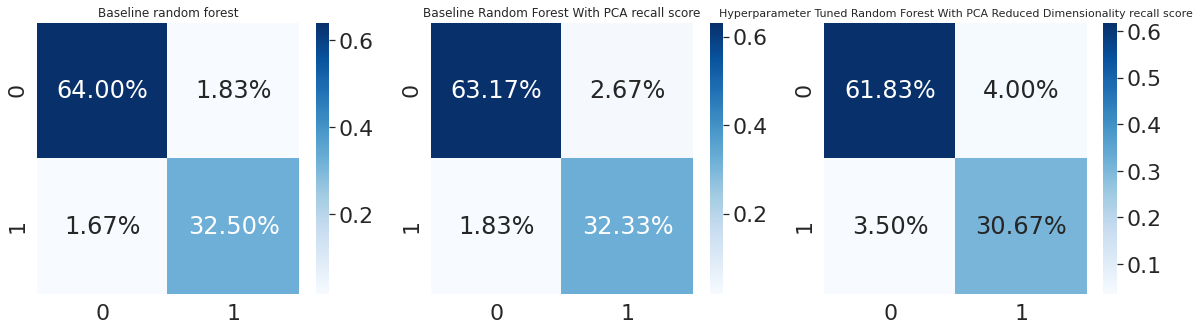

In [ ]:
import seaborn as sns

fig, axs = plt.subplots(ncols=3, figsize=(20,5))
sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred)), annot=True, fmt='.2%', cmap='Blues', ax=axs[0]).set_title('Baseline random forest', fontsize=12)
sns.heatmap(confusion_matrix(y_test, y_pred_pca)/np.sum(confusion_matrix(y_test, y_pred_pca)), annot=True, fmt='.2%', cmap='Blues', ax=axs[1]).set_title('Baseline Random Forest With PCA recall score', fontsize=12)
sns.heatmap(confusion_matrix(y_test, y_pred_gs)/np.sum(confusion_matrix(y_test, y_pred_gs)), annot=True, fmt='.2%', cmap='Blues', ax=axs[2]).set_title('Hyperparameter Tuned Random Forest With PCA Reduced Dimensionality recall score', fontsize=11)

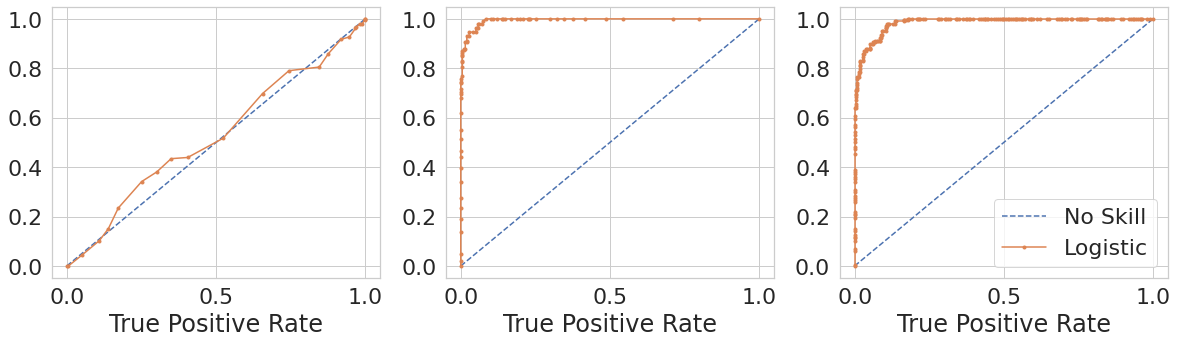

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,5))

lr_probs = rfc.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
ax1.set_xlabel('False Positive Rate')
ax1.set_xlabel('True Positive Rate')

lr_probs = rfc_1.predict_proba(X_test_scaled_pca)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
ax2.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax2.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
ax2.set_xlabel('False Positive Rate')
ax2.set_xlabel('True Positive Rate')

lr_probs = rfc_2.predict_proba(X_test_scaled_pca)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
ax3.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax3.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
ax3.set_xlabel('False Positive Rate')
ax3.set_xlabel('True Positive Rate')

pyplot.legend()
pyplot.show()

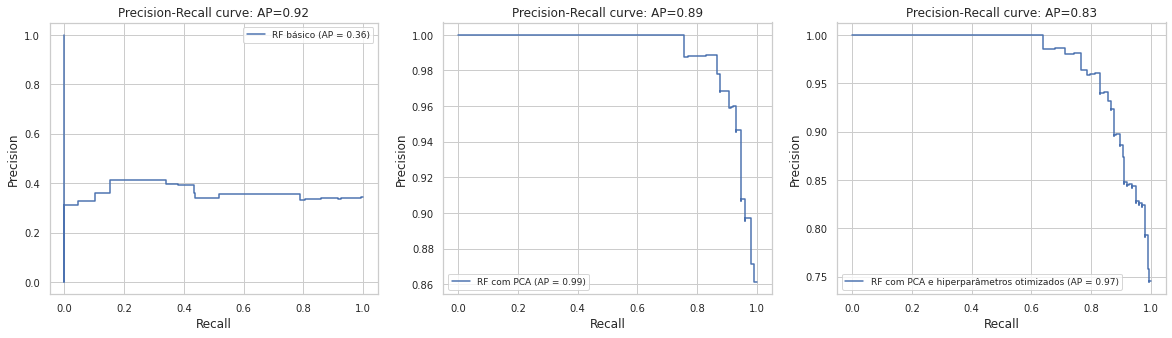

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,5))

average_precision = average_precision_score(y_test, y_pred)

disp = plot_precision_recall_curve(rfc, X_test, y_test, ax=ax1, name="RF básico")
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision), fontsize=12)
disp.ax_.legend(fontsize=9)
disp.ax_.xaxis.label.set_size(12)
disp.ax_.yaxis.label.set_size(12)
disp.ax_.tick_params(axis='both', which='major', labelsize=10)
disp.ax_.tick_params(axis='both', which='minor', labelsize=8)

average_precision = average_precision_score(y_test, y_pred_pca)

disp = plot_precision_recall_curve(rfc_1, X_test_scaled_pca, y_test, ax=ax2, name="RF com PCA")
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision), fontsize=12)
disp.ax_.legend(fontsize=9)
disp.ax_.xaxis.label.set_size(12)
disp.ax_.yaxis.label.set_size(12)
disp.ax_.tick_params(axis='both', which='major', labelsize=10)
disp.ax_.tick_params(axis='both', which='minor', labelsize=8)

average_precision = average_precision_score(y_test, y_pred_gs)

disp = plot_precision_recall_curve(rfc_2, X_test_scaled_pca, y_test, ax=ax3, name="RF com PCA e hiperparâmetros otimizados")
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision), fontsize=12)
disp.ax_.legend(fontsize=9)
disp.ax_.xaxis.label.set_size(12)
disp.ax_.yaxis.label.set_size(12)
disp.ax_.tick_params(axis='both', which='major', labelsize=10)
disp.ax_.tick_params(axis='both', which='minor', labelsize=8)

## Support Vector Machine

Aqui foi onde treinei o support vector machine aplicando os mesmos processos da seção anterior.

In [ ]:
from sklearn.model_selection import train_test_split

df_copy = df.copy()
X = df_copy.drop('Outcome', axis=1)
y = df_copy['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.30, random_state=2021, stratify=y)

Primeiro treinei um modelo sem pré-processar os dados.

In [ ]:
from sklearn.svm import SVC

svm_clf1 = SVC(probability=True)
svm_clf1.fit(X_train, y_train)

y_pred1 = svm_clf1.predict(X_test)
svm_clf1.score(X_test, y_test)

0.7883333333333333

Depois treinei um modelo após padronizar os dados e aplicar PCA neles.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipe_steps = [('scaler', StandardScaler()),
              ('pca', PCA(n_components=6)),
              ('SupVM', SVC(kernel='rbf', probability=True))]

svm_clf2 = Pipeline(pipe_steps)
svm_clf2.fit(X_train, y_train)

y_pred2 = svm_clf2.predict(X_test)
svm_clf2.score(X_test, y_test)

0.7983333333333333

O terceiro modelo foi treinado em um GridSearch com os melhores hyperparâmetros dentro do espaço de busca.

In [ ]:
from sklearn.model_selection import GridSearchCV

pipe_steps = [('scaler', StandardScaler()),
              ('pca', PCA()),
              ('SupVM', SVC(kernel='rbf', probability=True))]

check_params = {
    'pca__n_components':[6],
    'SupVM__C': [0.1, 0.5, 1, 10, 30, 40, 50, 75, 100, 500, 1000],
    'SupVM__gamma': [0.001, 0.005, 0.01, 0.05, 0.07, 0.1, 0.5, 1, 5, 10, 50]
}

pipeline = Pipeline(pipe_steps)

In [ ]:
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings('ignore')

for cv in tqdm(range(4,6)):
  create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv)
  create_grid.fit(X_train, y_train)
  print('score for %d fold CV := %3.2f' %(cv, create_grid.score(X_test, y_test)))
  print('BEST PARAMETERS:')
  print(create_grid.best_params_)

score for 4 fold CV := 0.95
BEST PARAMETERS:
{'SupVM__C': 1, 'SupVM__gamma': 10, 'pca__n_components': 6}
score for 5 fold CV := 0.95
BEST PARAMETERS:
{'SupVM__C': 1, 'SupVM__gamma': 10, 'pca__n_components': 6}



In [ ]:
svm_clf3 = create_grid.best_estimator_
y_pred3 = svm_clf3.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score

conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred1), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)
display('Baseline SVM recall score', recall_score(y_test, y_pred1))

conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred2), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)
display('Baseline SVM With PCA recall score', recall_score(y_test, y_pred2))

conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred3), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)
display('Hyperparameter Tuned SVM With PCA Reduced Dimensionality recall score', recall_score(y_test, y_pred3))

,predicted 0,predicted 1
actual 0,356,39
actual 1,88,117


'Baseline SVM recall score'

0.5707317073170731

,predicted 0,predicted 1
actual 0,347,48
actual 1,73,132


'Baseline SVM With PCA recall score'

0.6439024390243903

,predicted 0,predicted 1
actual 0,395,0
actual 1,32,173


'Hyperparameter Tuned SVM With PCA Reduced Dimensionality recall score'

0.8439024390243902

Text(0.5, 1.0, 'Hyperparameter Tuned SVM With PCA Reduced Dimensionality recall score')

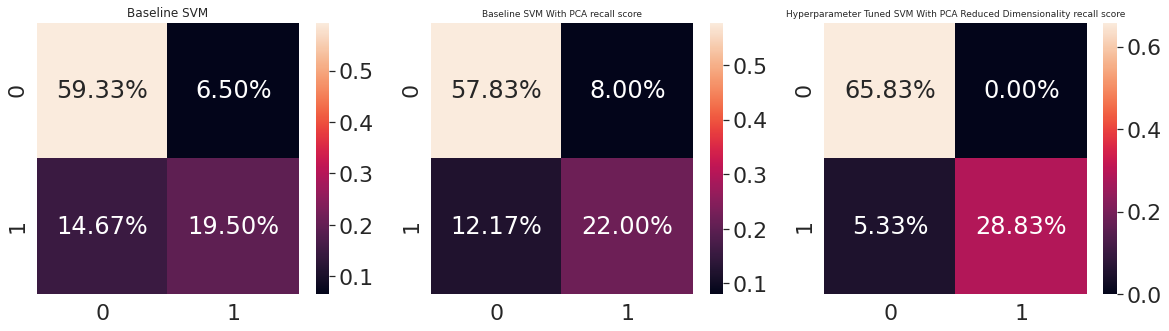

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(20,5))
sns.heatmap(confusion_matrix(y_test, y_pred1)/np.sum(confusion_matrix(y_test, y_pred1)), annot=True, fmt='.2%', ax=axs[0]).set_title('Baseline SVM', fontsize=12)
sns.heatmap(confusion_matrix(y_test, y_pred2)/np.sum(confusion_matrix(y_test, y_pred2)), annot=True, fmt='.2%', ax=axs[1]).set_title('Baseline SVM With PCA recall score', fontsize=9)
sns.heatmap(confusion_matrix(y_test, y_pred3)/np.sum(confusion_matrix(y_test, y_pred3)), annot=True, fmt='.2%', ax=axs[2]).set_title('Hyperparameter Tuned SVM With PCA Reduced Dimensionality recall score', fontsize=9)

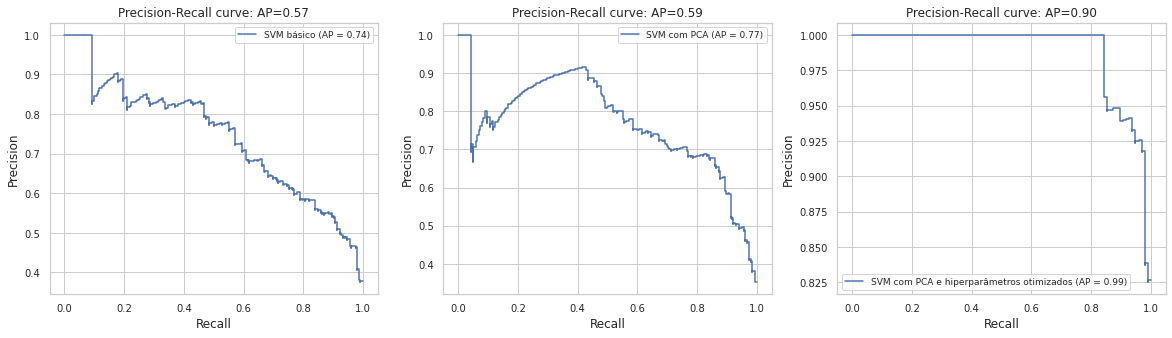

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,5))

average_precision = average_precision_score(y_test, y_pred1)

disp = plot_precision_recall_curve(svm_clf1, X_test, y_test, ax=ax1, name="SVM básico")
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision), fontsize=12)
disp.ax_.legend(fontsize=9)
disp.ax_.xaxis.label.set_size(12)
disp.ax_.yaxis.label.set_size(12)
disp.ax_.tick_params(axis='both', which='major', labelsize=10)
disp.ax_.tick_params(axis='both', which='minor', labelsize=8)

average_precision = average_precision_score(y_test, y_pred2)

disp = plot_precision_recall_curve(svm_clf2, X_test, y_test, ax=ax2, name="SVM com PCA")
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision), fontsize=12)
disp.ax_.legend(fontsize=9)
disp.ax_.xaxis.label.set_size(12)
disp.ax_.yaxis.label.set_size(12)
disp.ax_.tick_params(axis='both', which='major', labelsize=10)
disp.ax_.tick_params(axis='both', which='minor', labelsize=8)

average_precision = average_precision_score(y_test, y_pred3)

disp = plot_precision_recall_curve(svm_clf3, X_test, y_test, ax=ax3, name="SVM com PCA e hiperparâmetros otimizados")
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision), fontsize=12)
disp.ax_.legend(fontsize=9)
disp.ax_.xaxis.label.set_size(12)
disp.ax_.yaxis.label.set_size(12)
disp.ax_.tick_params(axis='both', which='major', labelsize=10)
disp.ax_.tick_params(axis='both', which='minor', labelsize=8)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

print("RF accuracy: ", accuracy_score(y_test, y_pred))
print("RF with PCA accuracy: ", accuracy_score(y_test, y_pred_pca))
print("RF with PCA optimized accuracy: ", accuracy_score(y_test, y_pred_gs))
print("RF recall: ", recall_score(y_test, y_pred, average='macro'))
print("RF with PCA recall: ",  recall_score(y_test, y_pred_pca, average='macro'))
print("RF with PCA optimized recall: ",  recall_score(y_test, y_pred_gs, average='macro'))
print("RF f1 ", f1_score(y_test, y_pred))
print("RF with PCA f1 ", f1_score(y_test, y_pred_pca))
print("RF with PCA optimized f1: ", f1_score(y_test, y_pred_gs))
print('RF average precision: ', average_precision_score(y_test, y_pred))
print('RF with PCA average precision: ', average_precision_score(y_test, y_pred_pca))
print('RF with PCA optimized average precision: ', average_precision_score(y_test, y_pred_gs))
print()
print("SVM accuracy: ", accuracy_score(y_test, y_pred1))
print("SVM with PCA accuracy: ", accuracy_score(y_test, y_pred2))
print("SVM with PCA optimized accuracy: ", accuracy_score(y_test, y_pred3))
print("SVM recall: ",  recall_score(y_test, y_pred1, average='macro'))
print("SVM with PCA recall: ",  recall_score(y_test, y_pred2, average='macro'))
print("SVM with PCA optimized recall: ",  recall_score(y_test, y_pred3, average='macro'))
print("SVM f1: ", f1_score(y_test, y_pred1))
print("SVM with PCA f1 ", f1_score(y_test, y_pred2))
print("SVM with PCA optimized f1 ", f1_score(y_test, y_pred3))
print('SVM average precision: ', average_precision_score(y_test, y_pred1))
print('SVM with PCA average precision: ', average_precision_score(y_test, y_pred2))
print('SVM with PCA optimized average precision: ', average_precision_score(y_test, y_pred3))

RF accuracy:  0.965
RF with PCA accuracy:  0.955
RF with PCA optimized accuracy:  0.925
RF recall:  0.9616857054646495
RF with PCA recall:  0.952917567150355
RF with PCA optimized recall:  0.918400740969435
RF f1  0.9489051094890512
RF with PCA f1  0.9349397590361446
RF with PCA optimized f1:  0.891041162227603
RF average precision:  0.9170929039387482
RF with PCA average precision:  0.8925725900116144
RF with PCA optimized average precision:  0.8289962476547843

SVM accuracy:  0.7883333333333333
SVM with PCA accuracy:  0.7983333333333333
SVM with PCA optimized accuracy:  0.9466666666666667
SVM recall:  0.7359987650509416
SVM with PCA recall:  0.761191725841309
SVM with PCA optimized recall:  0.921951219512195
SVM f1:  0.6481994459833794
SVM with PCA f1  0.6857142857142857
SVM with PCA optimized f1  0.9153439153439153
SVM average precision:  0.5747154471544715
SVM with PCA average precision:  0.5938617886178862
SVM with PCA optimized average precision:  0.8972357723577236


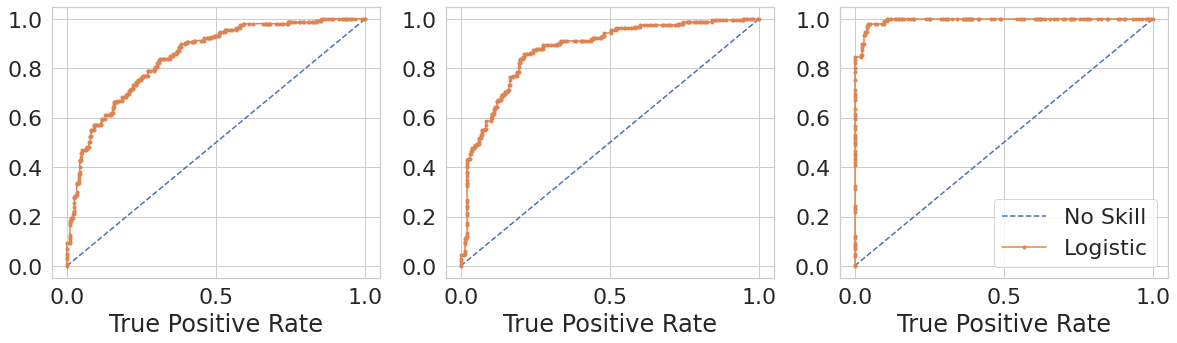

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,5))

lr_probs = svm_clf1.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
ax1.set_xlabel('False Positive Rate')
ax1.set_xlabel('True Positive Rate')

lr_probs = svm_clf2.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
ax2.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax2.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
ax2.set_xlabel('False Positive Rate')
ax2.set_xlabel('True Positive Rate')

lr_probs = svm_clf3.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
ax3.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax3.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
ax3.set_xlabel('False Positive Rate')
ax3.set_xlabel('True Positive Rate')

pyplot.legend()
pyplot.show()